### Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Важная для индустрии метрика — число клиентов, продолжающих покупать новые абонементы после окончания действия текущих.
Отдел по работе с клиентами «Культуриста-датасаентиста» собрал много анкет посетителей и перевёл их в электронный вид. 
* __Ваша задача — провести анализ и подготовить план действий по поддержанию лояльности клиентов.__

А именно:
1. научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. проанализировать основные признаки, наиболее сильно влияющие на отток;
4. сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
5. выделить целевые группы клиентов;
6. предложить меры по снижению оттока;
7. определить другие особенности взаимодействия с клиентами.

____

### Шаг 1. Загрузите данные
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил набор, который содержит данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

* __'Churn'__ — факт оттока в текущем месяце;

__Данные пользователя за предыдущий до проверки факта оттока месяц__
* __'gender'__ — пол
* __'Near_Location'__ — проживание или работа в районе, где находится фитнес-центр
* __'Partner'__ — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* __Promo_friends__ — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* __'Phone'__ — наличие контактного телефона
* __'Age'__ — возраст
* __'Lifetime'__ — время с момента первого обращения в фитнес-центр (в месяцах)

__Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента__
* __'Contract_period'__ — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* __'Month_to_end_contract'__ — срок до окончания текущего действующего абонемента (в месяцах)
* __'Group_visits'__ — факт посещения групповых занятий
* __'Avg_class_frequency_total'__ — средняя частота посещений в неделю за все время с начала действия абонемента
* __'Avg_class_frequency_current_month'__ — средняя частота посещений в неделю за предыдущий месяц
* __'Avg_additional_charges_total'__ — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

### Шаг 2. Проведите исследовательский анализ данных (EDA)
1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
4. Постройте матрицу корреляций и отобразите её.

### Шаг 3. Постройте модель прогнозирования оттока пользователей
1. Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
2. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
3. Обучите модель на train-выборке любым двумя способами:
        * логистической регрессией
        * случайным лесом
Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

### Шаг 4. Сделайте кластеризацию пользователей
__Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):__
1. Стандартизируйте данные.
2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! Можно ли по графику предположить, какое количество кластеров можно выбрать?
3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.
4. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
6. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
1. Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.
2. Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import math as mth
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,8)})

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
def firstlook(df):
    '''
    Функция для обзора датасета, размер, пропущенные значения, описание, типы даных, основные статистики
    '''
    print()
    print('=================')
    print(f'Размер датафрейма \n{df.shape}')
    print()
    print('=================')
    print(f'Info \n{df.info()}')
    print()
    print('=================')
    print(f'Доля пропущенных значений \n{df.isna().sum()/df.shape[0]}')
    print()
    print('=================')
    print(f'Количество дубликатов \n{df.duplicated().sum()}')
    print()
    print('=================')
    print(f'Описание данных')
    display(df.describe())
    print('=================')
    display(df.head())

In [4]:
firstlook(df)


Размер датафрейма 
(4000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB
Info

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [5]:
#уберем заглавные буквы в названии столбцов
df.columns = [i.lower() for i in df]

### Предобработка не требуется
    1. Большинство признаков бинарные
    2. Скорее всего, нет необходимости придумывать дополнительные фичи

---

## Шаг 2. Проведите исследовательский анализ данных (EDA)

In [6]:
# def feature_value_share(feature_list, df=df):
#     for feature in feature_list:
#         print(f'Cоотношение {feature} в датафрейме, %')
#         temp = ((df[feature].value_counts()/df.shape[0])*100).to_frame()
#         ax = temp.plot(kind='barh', figsize=(10,3))
#         ax.set(title=f'Барплот для значений по фиче {feature}')
#         plt.show()

In [7]:
# interesting_feature = ['gender','churn','lifetime','month_to_end_contract',
#                        'contract_period','near_location','promo_friends']
# feature_value_share(interesting_feature)

### 1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения

In [8]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


### 2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [9]:
#исключим бинарные переменные, остальные добавим в список
not_binary_features = [i for i in df.columns if df[i].nunique()!=2]
#посчитаем среднее по всем не бинарным признакам для группы оттока и оставшихся
df.groupby('churn').agg({i:'mean' for i in not_binary_features if i != 'churn'})

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,
0,5.747193,29.976523,158.445715,5.888397,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,2.582469,0.990575,1.474995,1.044546


### Вывод
__Для оттока характерны:__
* __contract_period__ ~ 1.7 (ниже, чем у не отточных) краткосрочные абонементы
* __avg_additional_charges_total__ ~ 115, низкая суммарная выручка от других услуг фитнес клуба
* __month_to_end_contract__ ~ 2.5 меньше времени до окончания действия абонемента (должно коррелировать с contract_period)
* __lifetime__ ~ 0.99, время с момента первого посещения клуба около 1 месяца (должно коррелировать с contract_period)
* __avg_class_frequency_total__ ~ 1.47, частота посещений в неделю ниже, чем у не отточных клиентов
* __avg_class_frequency_current_month__ ~1.04, в последний месяц в среднем посещали клуб 1 раз, что ниже, чем у не оттточных клиентов
* __age__ ~ 26.9, клиенты в оттоке в среднем моложе, чем в не оттоке

### Соотношение классов в датафрейме

In [10]:
(df.churn.value_counts()/df.shape[0]).to_frame()

,churn
0,0.73475
1,0.26525


### 3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался

### Построим барплоты
* относительный график по каждому дискретному и бинарному признаку в группе отток и не отток
    * сформируем список с категориальными и бинарными признаками

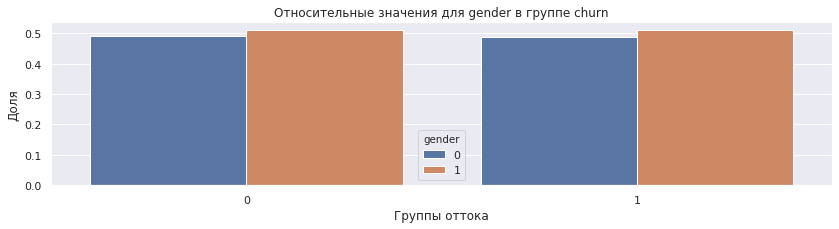

,churn,gender,count,total_in_churn,share
0,0,0,1440,2939,0.489963
1,0,1,1499,2939,0.510037
2,1,0,519,1061,0.489161
3,1,1,542,1061,0.510839


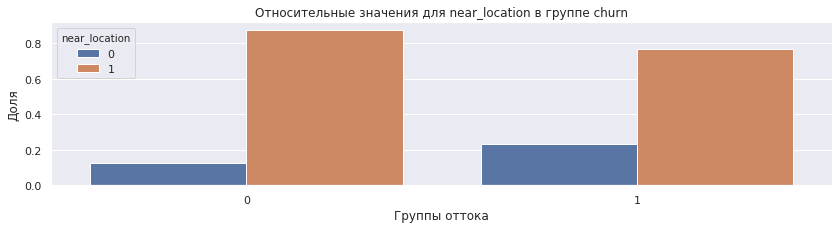

,churn,near_location,count,total_in_churn,share
0,0,0,373,2939,0.126914
1,0,1,2566,2939,0.873086
2,1,0,246,1061,0.231857
3,1,1,815,1061,0.768143


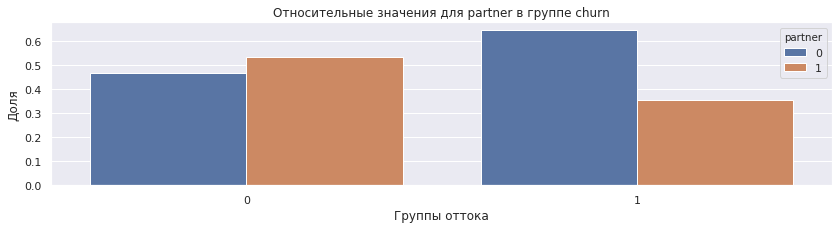

,churn,partner,count,total_in_churn,share
0,0,0,1369,2939,0.465805
1,0,1,1570,2939,0.534195
2,1,0,684,1061,0.644675
3,1,1,377,1061,0.355325


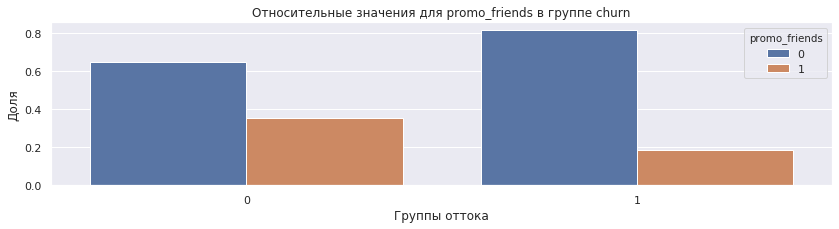

,churn,promo_friends,count,total_in_churn,share
0,0,0,1900,2939,0.646478
1,0,1,1039,2939,0.353522
2,1,0,866,1061,0.816211
3,1,1,195,1061,0.183789


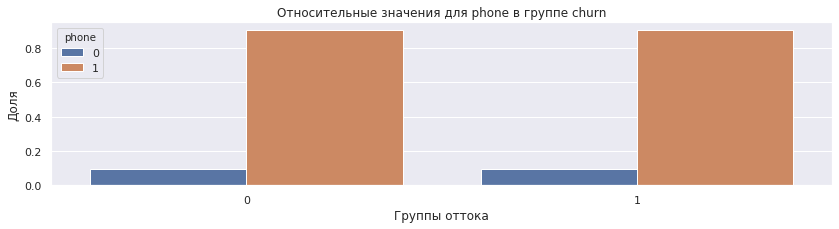

,churn,phone,count,total_in_churn,share
0,0,0,283,2939,0.096291
1,0,1,2656,2939,0.903709
2,1,0,103,1061,0.097078
3,1,1,958,1061,0.902922


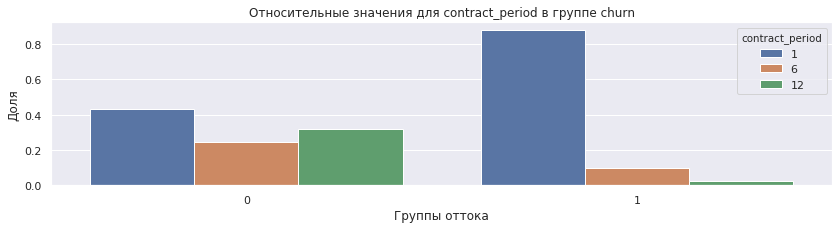

,churn,contract_period,count,total_in_churn,share
0,0,1,1273,2939,0.433141
1,0,6,729,2939,0.248044
2,0,12,937,2939,0.318816
3,1,1,934,1061,0.880302
4,1,6,104,1061,0.098021


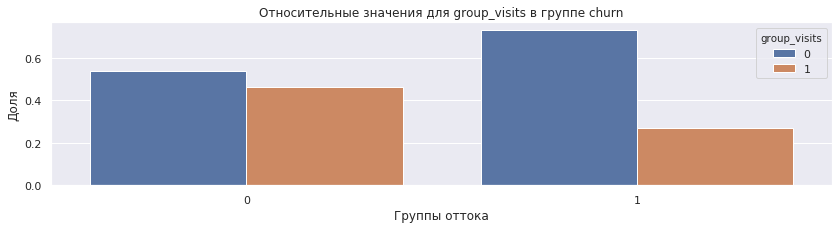

,churn,group_visits,count,total_in_churn,share
0,0,0,1575,2939,0.535897
1,0,1,1364,2939,0.464103
2,1,0,776,1061,0.731385
3,1,1,285,1061,0.268615


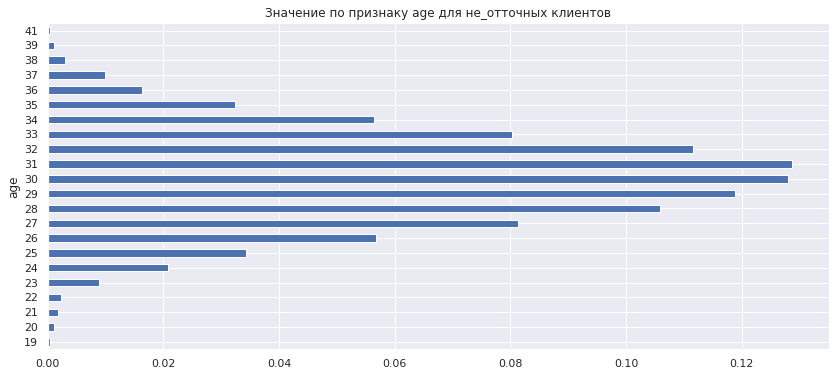

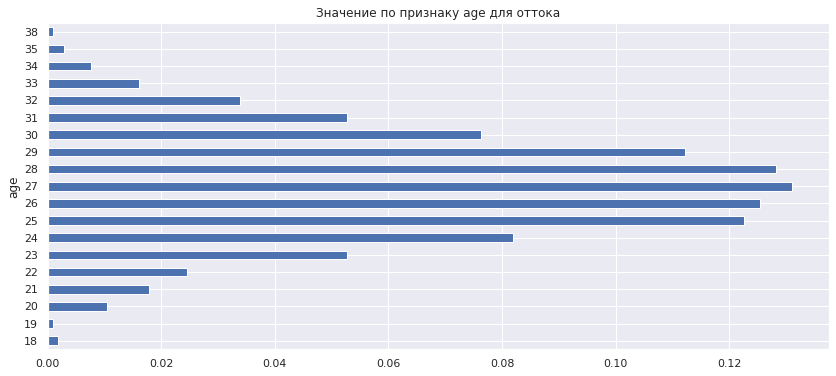

,churn,age,count,total_in_churn,share
0,0,19,1,2939,0.000340
1,0,20,3,2939,0.001021
2,0,21,5,2939,0.001701
3,0,22,7,2939,0.002382
4,0,23,26,2939,0.008847


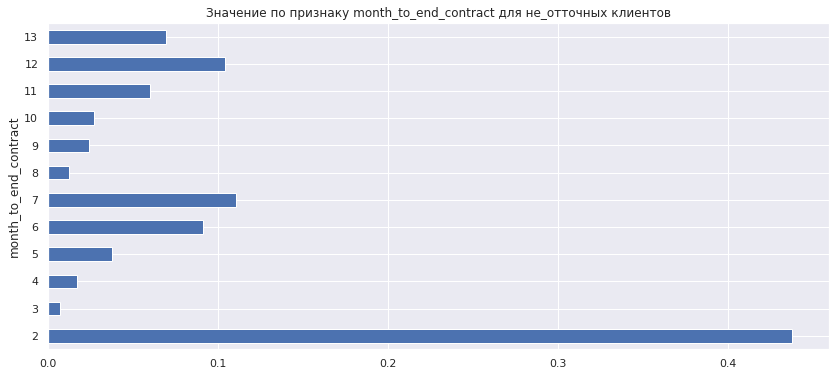

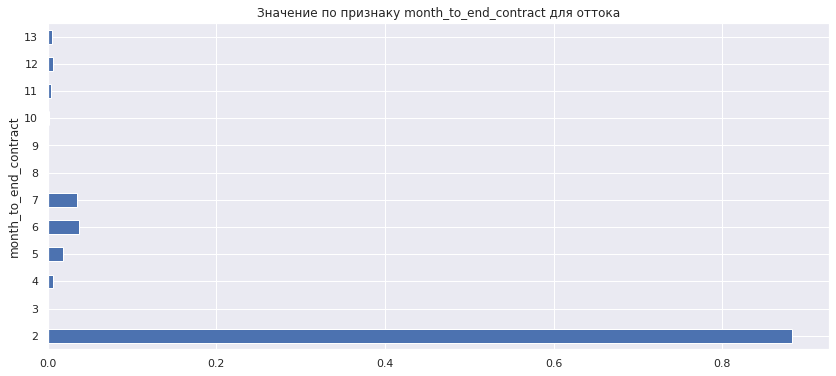

,churn,month_to_end_contract,count,total_in_churn,share
0,0,2,1285,2939,0.437224
1,0,3,22,2939,0.007486
2,0,4,51,2939,0.017353
3,0,5,111,2939,0.037768
4,0,6,268,2939,0.091187


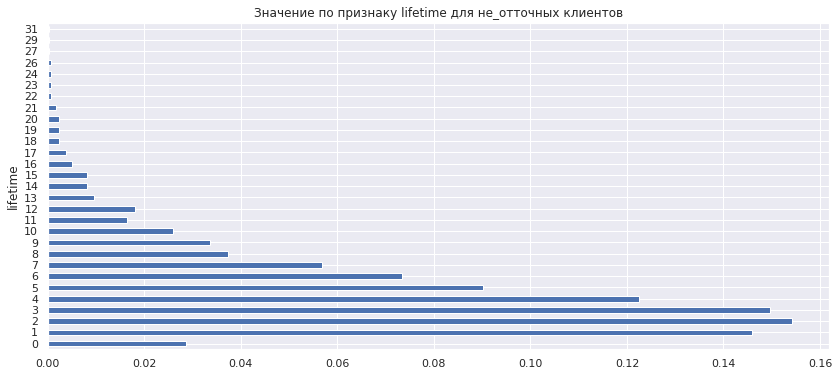

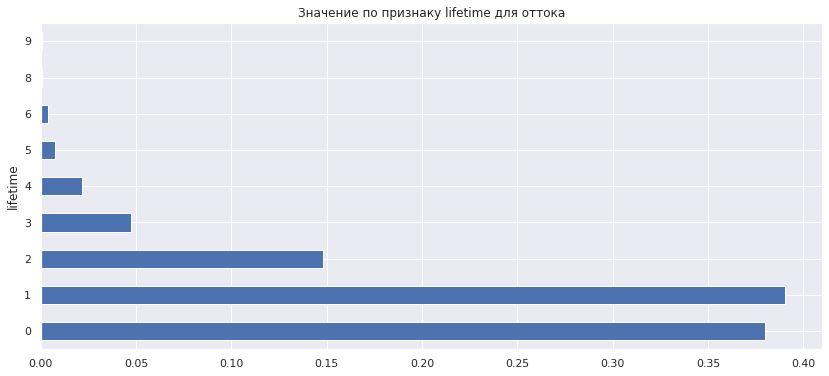

,churn,lifetime,count,total_in_churn,share
0,0,0,84,2939,0.028581
1,0,1,429,2939,0.145968
2,0,2,453,2939,0.154134
3,0,3,440,2939,0.149711
4,0,4,360,2939,0.122491


In [11]:
#формируем список фичей из дискретных и бинарных значений, на основе правила, число уникальных значений < 50% датафрейма
list_cat = [i for i in df if (df[i].nunique()<2000) and (i!='churn')]
list_cont = [i for i in df if (i not in list_cat) and (i != 'churn')]

for i in list_cat:
    #для каждого графика формируем таблицу с относительными значениями фичи в группе отток/оставшиеся
    temp = df.groupby(['churn',i]).count().iloc[:,:1].reset_index()
    temp.columns = ['churn',i,'count']
    temp['total_in_churn'] = temp['count'].groupby(temp['churn']).transform('sum')
    temp['share'] = temp['count']/temp['total_in_churn']
    #если число уник значений в фиче больше 5, на графике не помещаются две группы (отток/оставшиеся), переносим на другой график
    if df[i].nunique()<5:
        plt.figure(figsize=(14, 3))
        ax = sns.barplot(x='churn', y='share', data=temp, hue=i)
        ax.set(title=f'Относительные значения для {i} в группе churn', ylabel='Доля', xlabel='Группы оттока')
        plt.show()
    else:
        ax = temp[temp['churn']==0].set_index(i)['share'].plot(kind='barh', figsize=(14,6))
        ax.set(title=f'Значение по признаку {i} для не_отточных клиентов')
        plt.show()
        ax = temp[temp['churn']==1].set_index(i)['share'].plot(kind='barh', figsize=(14,6))
        ax.set(title=f'Значение по признаку {i} для оттока')
        plt.show()
        
    display(temp.head())

### Построим гистограммы для непрерывных переменных

Медианные значения для признака avg_additional_charges_total
Отток: 103.81; Оставшиеся: 149.88; Относительная разница: 44.38%


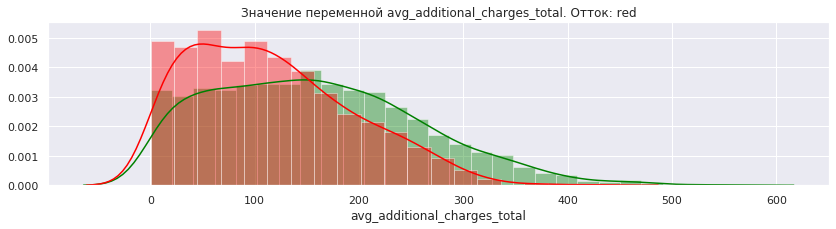

Медианные значения для признака avg_class_frequency_total
Отток: 1.49; Оставшиеся: 2.04; Относительная разница: 36.91%


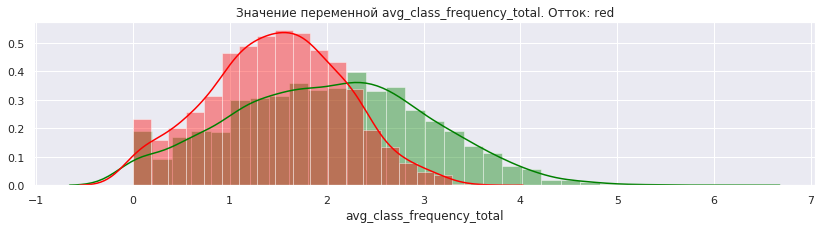

Медианные значения для признака avg_class_frequency_current_month
Отток: 0.98; Оставшиеся: 2.05; Относительная разница: 109.18%


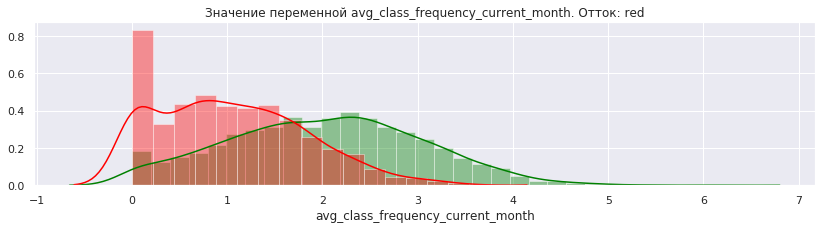

In [12]:
for i in list_cont:
    churn_median_feature = round((df[df['churn']==1][i]).median(),2)
    not_churn_median_feature = round((df[df['churn']==0][i]).median(),2)
    
    print(f'Медианные значения для признака {i}\nОтток: {churn_median_feature}; Оставшиеся: {not_churn_median_feature}; '
    f'Относительная разница: {(not_churn_median_feature/churn_median_feature-1):.2%}')
    
    plt.figure(figsize=(14, 3))
    ax = sns.distplot(df[df['churn']==0][i], color="green")
    ax.set(title=f'Значение переменной {i}. Отток: red')
    ax = sns.distplot(df[df['churn']==1][i], color="red")
    plt.show()

### Вывод
__Для оттока характерны в большей степени, чем для не оттока следующие значения признаков:__
1. Посетители клуба не имеющие партнера, признак __partner__ = 0
2. Не использовали код от друзей при покупке абонемента ~ нет знакомых в клубе, признак __promo_friends__ = 0
3. Имеют непродолжительные абонемент, признак __contract_period__ = 1
4. Не посещают груповые занятия, признак __group_visit__ = 0
5. Отточные клиенты моложе, чем не отточные, median(age) ~ 26 лет
6. Медианное значение __avg_additional_charges_total__ у оттока ниже, относительная разница: 44.38% --> низкая суммарная выручка от других услуг фитнес-центра
7. Медианное значение __avg_class_frequency_total__ у оттока ниже, относительная разница: 36.91% --> меньше посещений в неделю
8. Медианное значение __avg_class_frequency_current_month__ у оттока ниже, относительная разница: 109.18% --> меньше посещений в месяц

### 4. Постройте матрицу корреляций и отобразите её.
* Для категориальных и непрерывных переменных используем ранговую корреляцию, тк некоторые признаки распределены не нормальным образом
* Для двух бинарных переменных следует использовать Phi коэффициент __(но не нашел готовый метод/библиотеку :( )__ 
    * Источник: http://cawi.fsocium.com/vortex/help/terms/stat/koef.html

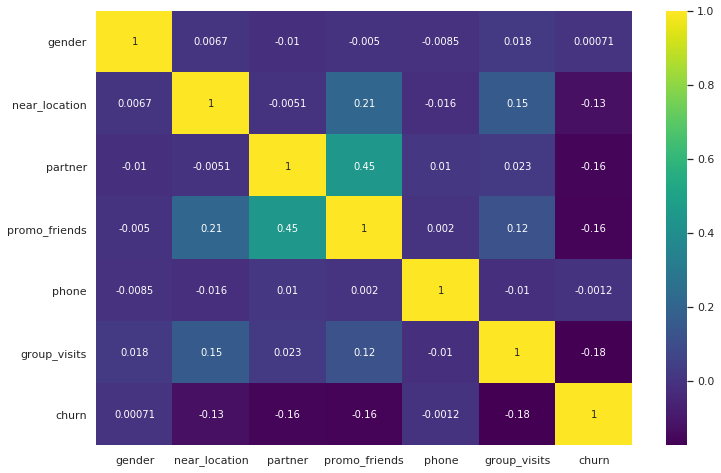

In [13]:
#отдельно бинарные переменные
plt.figure(figsize=(12, 8))
sns.heatmap(df[[i for i in df if df[i].nunique()==2]].corr(method='spearman'), cmap='viridis', annot=True)
plt.show()

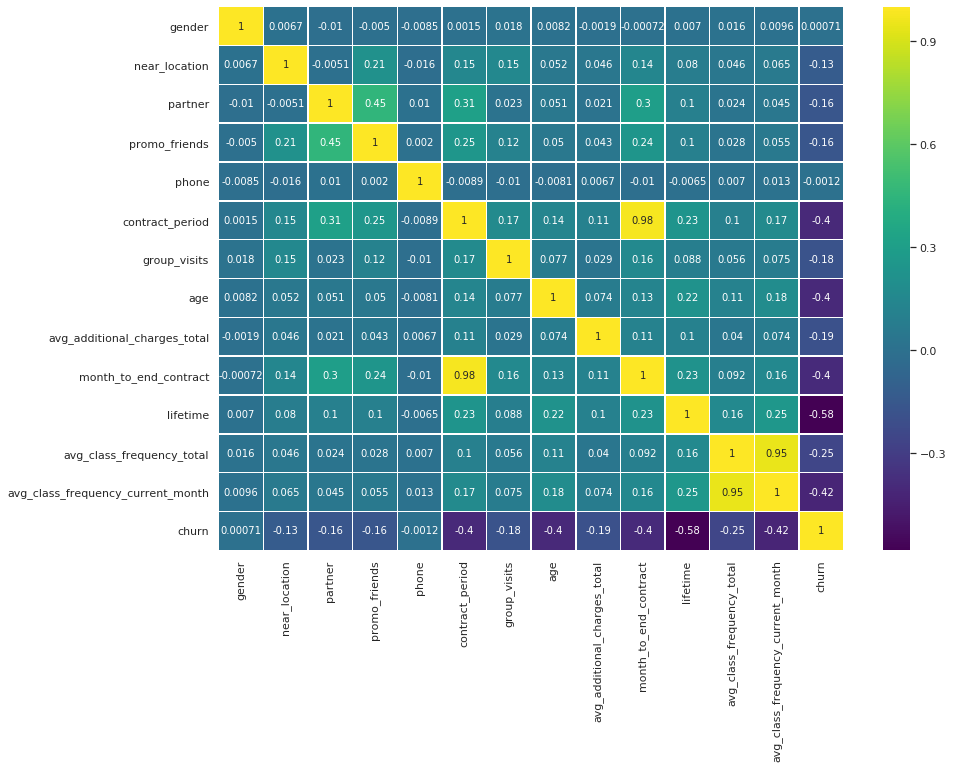

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(method='spearman'), cmap='viridis', annot=True, linewidths=0.5)
plt.show()

__Топ высоких корреляций по модулю между признаками, исключив корреляции == 1 по диагонали__

In [15]:
#выведем топ корреляций по модулю, исключив корреляции == 1 по диагонали
df_cor=(df.corr(method='spearman')).abs().unstack().sort_values(ascending=False).reset_index()
df_cor.columns = ['Feature_1', 'Feature_2','r']
df_cor.query('r!=1').head(15)

,Feature_1,Feature_2,r
14,contract_period,month_to_end_contract,0.976861
15,month_to_end_contract,contract_period,0.976861
16,avg_class_frequency_current_month,avg_class_frequency_total,0.947482
17,avg_class_frequency_total,avg_class_frequency_current_month,0.947482
18,lifetime,churn,0.582987
19,churn,lifetime,0.582987
20,promo_friends,partner,0.451960
21,partner,promo_friends,0.451960
22,avg_class_frequency_current_month,churn,0.420343
23,churn,avg_class_frequency_current_month,0.420343


__Топ низких корреляций с целевой переменной__

In [16]:
df_cor[(df_cor['Feature_1']!='churn') & (df_cor['Feature_2']=='churn')].sort_values('r').head(10)

,Feature_1,Feature_2,r
195,gender,churn,0.000708
191,phone,churn,0.001177
80,near_location,churn,0.128098
67,partner,churn,0.157986
60,promo_friends,churn,0.162233
55,group_visits,churn,0.175325
51,avg_additional_charges_total,churn,0.191432
34,avg_class_frequency_total,churn,0.253104
29,month_to_end_contract,churn,0.395225
26,age,churn,0.401664


### Некоторые признаки имеют выраженную мультиколлинеарность с другими признаками, это может ухудшить качество модели. Возможно, их стоит исключить:
* contract_period  - month_to_end_contract
* avg_class_frequency_current_month - avg_class_frequency_total

__Оставим те признаки из пары, которые имеют наибольшую корреляцию с оттоком__


### Так же есть признаки, которые имеют слабую корреляцию r<0.1 c целевой переменно, удалим их
* gender
* phone

In [17]:
hight_multi_corr_list = ['contract_period','month_to_end_contract',
                    'avg_class_frequency_current_month','avg_class_frequency_total']

df_cor[(df_cor['r']!=1) & (df_cor['Feature_1'].isin(hight_multi_corr_list)) & (df_cor['Feature_2'] == 'churn')]

,Feature_1,Feature_2,r
22,avg_class_frequency_current_month,churn,0.420343
24,contract_period,churn,0.402096
29,month_to_end_contract,churn,0.395225
34,avg_class_frequency_total,churn,0.253104


Дропнем __avg_class_frequency_total__ и __month_to_end_contract__ и сохраним в отдельный датафрейм
* сравним в последующем обученную модель на всем датафрейме и на новом

In [18]:
df_new = df.drop(['avg_class_frequency_total','month_to_end_contract','gender','phone'], axis=1)

In [19]:
(df.shape[1]-4) == df_new.shape[1]

True

---

## Шаг 3. Постройте модель прогнозирования оттока пользователей

1. Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
2. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
3. Обучите модель на train-выборке любыми двумя способами:
        * логистической регрессией
        * случайным лесом
Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

#### Метрики
__Recall__ - более важен там, где не нужны ложные отрицательные срабатывания. Правильно ли мы нашли всех представителей положительного класса?
Когда максимизируем: Выберет абсолютно ВСЕ верные объекты и возможно часть неверных объектов. "Жадный"
TP / (TP + FN)

__Precision__ - более важен в ситуациях, где не нужны ложные положительные срабатывания. Сколько было ложных срабатываний?
Когда увеличиваем: объекты, которые он выберет будут точно верными, но при этом пропустит часть верных. Точный.
TP / (TP + FP)

__F-мера__ (среднее гармоническое между Precision и Recall)
F1 = 2 * (Precision * Recall) / (Precision + Recall)

__За основную метрику возьмем f-меру, тк у нас нет данных что более важно - precision или recall. При этом есть дисбаланс классов -> поэтому мы не можем использовать accuracy__

In [20]:
#вместо df_new будем подавать разные датафреймы
def simple_bruteforce(df,max_estim,max_depth,mod_type):
    
    df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345, shuffle = True)
    features_train = df_train.drop(['churn'], axis=1)
    target_train = df_train['churn']
    features_valid = df_valid.drop(['churn'], axis=1)
    target_valid = df_valid['churn']

    #создадим списки для записи метрик и гиперпараметров
    model_type,depth,estimators,accuracy,recall,precision,f1score = [[]] * 7

    for i in range(5,max_depth,1):
        
        if mod_type == 'RandomForestClassifier':
            model = RandomForestClassifier(random_state=12345, n_estimators=max_estim, max_depth=i) #min_samples_leaf
            depth.append(i)
        elif mod_type == 'LogisticRegression':
            model = LogisticRegression(random_state=12345)
            depth.append(0)
        #добавляем тип модели для отчета
        model_type.append(mod_type)
        #обучаем на трейне
        model.fit(features_train, target_train)
        #предсказываем класс на валидационном x
        prediction = model.predict(features_valid)
        #сравниваем предсказания на валидации по x с отложенными результатами на валидации y, считаем метрики и добавляем в список
        accuracy.append(accuracy_score(target_valid,prediction))
        recall.append(recall_score(target_valid,prediction))
        precision.append(precision_score(target_valid,prediction))
        f1score.append(f1_score(target_valid,prediction))
        if mod_type == 'LogisticRegression':
            break
    #формируем датафрейм с метриками
    report = pd.DataFrame({'model_type':model_type,'max_depth':depth,'accuracy_score':accuracy,
                          'recall_score':recall, 'precision_score':precision,'f1_score':f1score})
    
    print(f'{mod_type}\nмаксимальный f1_score = {report.f1_score.max():.3f}\nмаксимальный accuracy_score '
          f'= {report.accuracy_score.max()}')
    return report

### Используем изначальный датафрейм df

### Random Forest Classifier

In [21]:
#max_estim = 200
#max_depth = 25
simple_bruteforce(df,200,25,'RandomForestClassifier')

RandomForestClassifier
максимальный f1_score = 0.836
максимальный accuracy_score = 0.916


,model_type,max_depth,accuracy_score,recall_score,precision_score,f1_score
0,RandomForestClassifier,5,0.897,0.740458,0.847162,0.790224
1,RandomForestClassifier,6,0.906,0.786260,0.844262,0.814229
2,RandomForestClassifier,7,0.907,0.790076,0.844898,0.816568
3,RandomForestClassifier,8,0.910,0.809160,0.841270,0.824903
4,RandomForestClassifier,9,0.910,0.809160,0.841270,0.824903
5,RandomForestClassifier,10,0.910,0.801527,0.846774,0.823529
6,RandomForestClassifier,11,0.913,0.809160,0.851406,0.829746
7,RandomForestClassifier,12,0.914,0.816794,0.849206,0.832685
8,RandomForestClassifier,13,0.916,0.816794,0.856000,0.835938
9,RandomForestClassifier,14,0.914,0.809160,0.854839,0.831373


### Используем датафрейм df_new, где дропнуты признаки с мультиколлинеарностью и низкой по модулю корреляцией с целевой переменной

In [22]:
#max_estim = 200
#max_depth = 25
simple_bruteforce(df_new,200,25,'RandomForestClassifier')

RandomForestClassifier
максимальный f1_score = 0.809
максимальный accuracy_score = 0.901


,model_type,max_depth,accuracy_score,recall_score,precision_score,f1_score
0,RandomForestClassifier,5,0.896,0.744275,0.840517,0.789474
1,RandomForestClassifier,6,0.893,0.748092,0.827004,0.785571
2,RandomForestClassifier,7,0.895,0.767176,0.820408,0.792899
3,RandomForestClassifier,8,0.895,0.774809,0.815261,0.794521
4,RandomForestClassifier,9,0.898,0.774809,0.825203,0.799213
5,RandomForestClassifier,10,0.897,0.782443,0.816733,0.799220
6,RandomForestClassifier,11,0.898,0.797710,0.810078,0.803846
7,RandomForestClassifier,12,0.899,0.797710,0.813230,0.805395
8,RandomForestClassifier,13,0.894,0.786260,0.804688,0.795367
9,RandomForestClassifier,14,0.896,0.786260,0.811024,0.798450


---

### Logistic Regression

### Используем изначальный датафрейм df

In [23]:
simple_bruteforce(df,200,25,'LogisticRegression')

LogisticRegression
максимальный f1_score = 0.851
максимальный accuracy_score = 0.924


,model_type,max_depth,accuracy_score,recall_score,precision_score,f1_score
0,LogisticRegression,0,0.924,0.828244,0.875,0.85098


### Используем датафрейм df_new, где дропнуты признаки с мультиколлинеарностью и низкой по модулю корреляцией с целевой переменной

In [24]:
simple_bruteforce(df_new,200,25,'LogisticRegression')

LogisticRegression
максимальный f1_score = 0.814
максимальный accuracy_score = 0.903


,model_type,max_depth,accuracy_score,recall_score,precision_score,f1_score
0,LogisticRegression,0,0.903,0.80916,0.818533,0.81382


## Вывод 
* Лучший результат показывает более простой алгоритм - логистическая регрессия на изначальном датафрейме, чем ансамбль из решающих деревьев

---
<div class="alert alert-block alert-success">

## Комментарий от наставника

Хорошее сравнение моделей. Кстати в логистической регрессии тоже можно пройтись по параметрам. Например, попробовать изменять силу (параметр C) и тип регуляризации (параметр penalty).
</div>

---

---

### Сделаем еще попытку получить лучший результат на случайном лесе и попробуем применить кроссвалидацию и автоматический подбор параметров
* Применим __cross_val_score__.
    * Тестируем нашу модель на нескольих фолдах(кусках) данных. Данные делятся на несколько кусков (фолдов) и каждый кусок данных побывал и на обучении и на тесте. После этого сравниваем выбранную метрику по усредненному значению и выберам оптимальные параметры.
    
* Воспользуемся готовым методом и автоматизируем подбор параметров с помощью __GridSearchCV__
    * GridSearchCV позволяет взять модель, набор параметров и при помощи кросс-валидации отобрать такую комбинацию параметров, которая дает лучший результат. В качестве оптимизации можем выбирать разные метрики, которые нам необходимо максимизировать: accuracy, f1-мера, roc-auc.

* Не будем сохранять параметры в датафрейм, а воспользуемся __classification_report__ или распечатаем лучшие параметры

In [25]:
def simple_bruteforce_update(df, parametrs):
    df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345, shuffle = True)
    features_train = df_train.drop(['churn'], axis=1)
    target_train = df_train['churn']
    features_valid = df_valid.drop(['churn'], axis=1)
    target_valid = df_valid['churn']
    
    model = RandomForestClassifier()
    #фолдов = 4, передаем модель и параметры
    #для оптимизационную метрику не получается передать f1_score, возьмем accuracy
    grid_search_cv_clf = GridSearchCV(model, parametrs, cv=4, scoring='accuracy')
    #обучение на трейне
    grid_search_cv_clf.fit(features_train, target_train)
    #сохраняем лучшие параметры модели
    best_clf = grid_search_cv_clf.best_estimator_
    #сохраним на сколько часто дерево сплитовалось по каждой переменной, это будет важность фичи при сплите дерева
    feature_importance = best_clf.feature_importances_
    #получаем предсказанные значения на валидационной части для лучшей модели
    prediction = best_clf.predict(features_valid)
    print(f'f1_score: {f1_score(target_valid,prediction):.3f}; accuracy_score: {accuracy_score(target_valid,prediction)}\n'
    f'Параметры выбранной модели: {grid_search_cv_clf.best_params_}')
    
    feature_importances_df = pd.DataFrame({'features': list(features_train), 'feature_importances' : feature_importance})
    display(feature_importances_df)
    

### Для изначального датафрейма

In [26]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(10, 25),'n_estimators':[200]}
simple_bruteforce_update(df,parametrs)

f1_score: 0.822; accuracy_score: 0.909
Параметры выбранной модели: {'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 200}


,features,feature_importances
0,gender,0.012844
1,near_location,0.010164
2,partner,0.012149
3,promo_friends,0.012358
4,phone,0.005932
5,contract_period,0.074066
6,group_visits,0.015766
7,age,0.117376
8,avg_additional_charges_total,0.091132
9,month_to_end_contract,0.073822


### Для датафрейма df_new

In [27]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(10, 25),'n_estimators':[200]}
simple_bruteforce_update(df_new,parametrs)

f1_score: 0.802; accuracy_score: 0.898
Параметры выбранной модели: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


,features,feature_importances
0,near_location,0.010518
1,partner,0.013319
2,promo_friends,0.014393
3,contract_period,0.145036
4,group_visits,0.018159
5,age,0.138530
6,avg_additional_charges_total,0.107571
7,lifetime,0.349436
8,avg_class_frequency_current_month,0.203039


## Вывод
* Наилучший результат показала логистическая регрессия на изначальном датафрейме
    * максимальный f1_score = 0.851
    * максимальный accuracy_score = 0.924


----

## Шаг 4. Сделайте кластеризацию пользователей

### 1. Стандартизируйте данные

In [28]:
#отбросим значение класса и стандартизируем данные
df_stand = df.drop(['churn'],axis=1)
#сохраним названия колонок в список
df_columns_list = df_stand.columns
#стандартизируем
df_stand = StandardScaler().fit_transform(df_stand)
#восстановим датафрейм
df_stand = pd.DataFrame(df_stand, columns=df_columns_list).astype('float64')

In [29]:
df_stand.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,-0.002949,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,2.048814,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.772361,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.792343,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.772361,-0.193329,-0.787076,-0.614542


### 2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время!
    * Можно ли по графику предположить, какое количество кластеров можно выбрать?

In [30]:
#сгенерируем матрицу
linked = linkage(df_stand, method = 'ward')

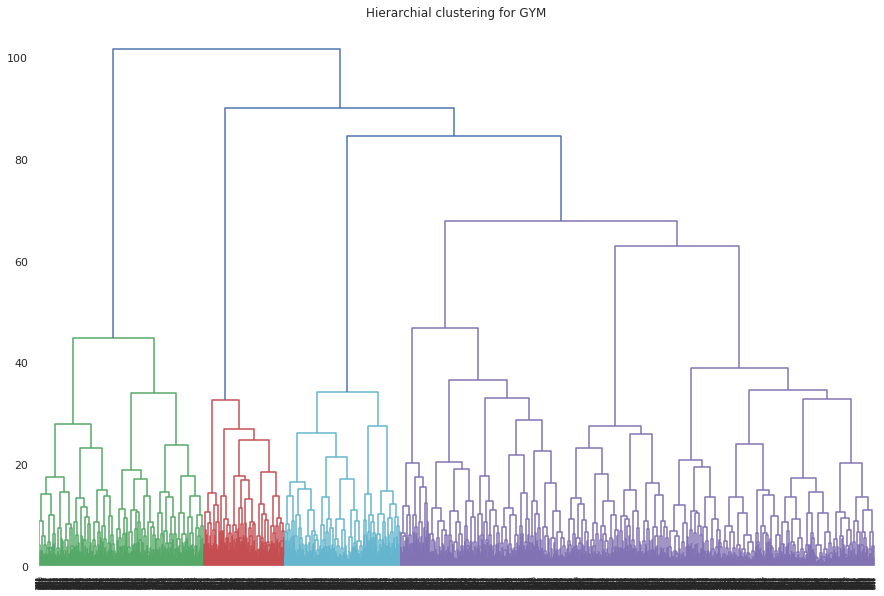

In [31]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

### Выделим оптимальное число кластеров = 4
   * При необходимости можно разбить на большее число кластеров, но оптимальное решение можно найти с помощью likage, либо подбора  + минимизируя межкластерное расстояние

### 3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.

In [32]:
# задаём модель k_means с числом кластеров 4
km = KMeans(n_clusters = 4)
#прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 3)
#сохраняем в переменную labels
labels = km.fit_predict(df_stand)
# сохраняем метки кластера в поле изначального датасета
df['cluster'] = labels

In [33]:
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0,2


In [34]:
#распечатаем долю наблюдений в каждом кластере от всех наблюдений в датафрейме
df.cluster.value_counts()/df.shape[0]

2    0.37450
3    0.26725
1    0.26175
0    0.09650
Name: cluster, dtype: float64

### 4. Посмотрите на средние значения признаков для кластеров. 
   * Можно ли сразу что-то заметить?

In [35]:
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,5.145078,3.940415,1.854211,1.723967,0.266839
1,0.503343,0.940783,0.773639,0.569245,1.0,10.825215,0.543457,29.934097,160.970662,10.178606,4.759312,1.977140,1.970916,0.027698
2,0.489987,0.761015,0.385180,0.195594,1.0,1.930574,0.294393,28.048064,130.163620,2.713618,2.243658,1.210336,0.957516,0.556075
3,0.540692,0.863424,0.353601,0.212348,1.0,2.483630,0.443405,30.000935,157.707360,3.122544,4.709074,2.728909,2.717352,0.089804


### Вывод
   * __Кластер с лейблом = 2__ имеет наименьший средний отток.
       * При этом у него самые высокие значения по признакам contract_period, month_to_end_contract, avg_additional_charges_total. Эти люди много тратят на доп услуги,у них длинные абонементы и срок окончания еще не скоро. При изучении данных эти признаки так же выделялись у не_отточных клиентов. 
       
   * __Кластер с лейблом = 1__ по среднему показателю оттока немного уступает кластеру 2. Среднее значение contract_period меньше, чем у второго кластера, абонементы с более коротким сроком. Но такие клиенты чаще чем клиенты во втором кластере, посещают фитнес, об этом свидетельствуют значения avg_class_frequency_total и avg_class_frequency_current_month

### 5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

gender


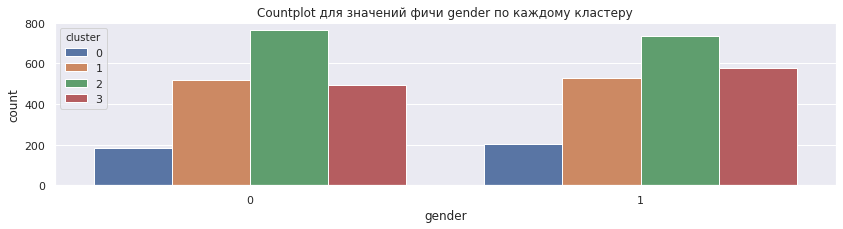

near_location


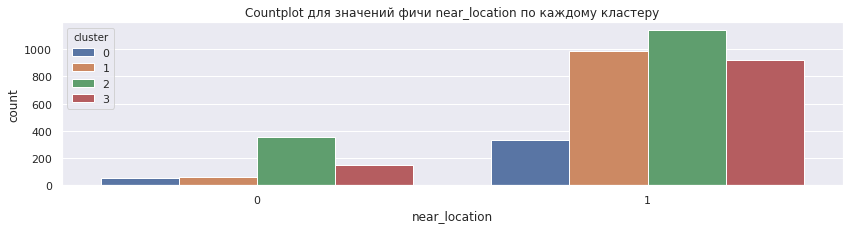

partner


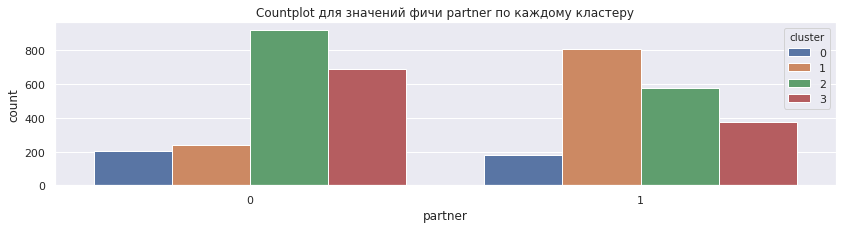

promo_friends


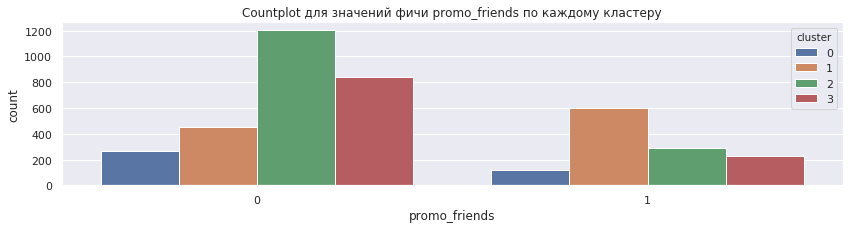

phone


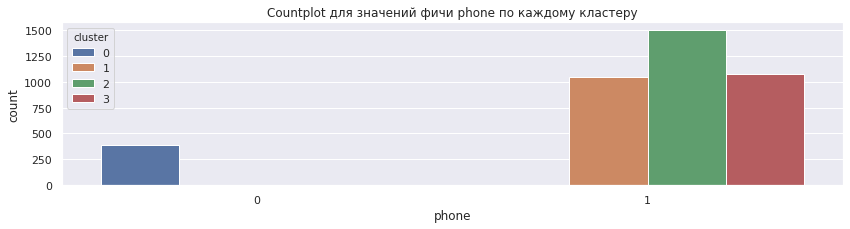

contract_period


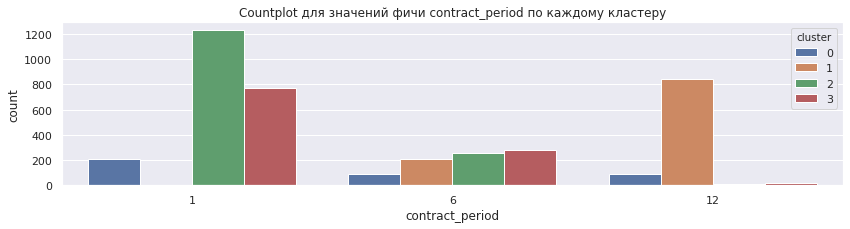

group_visits


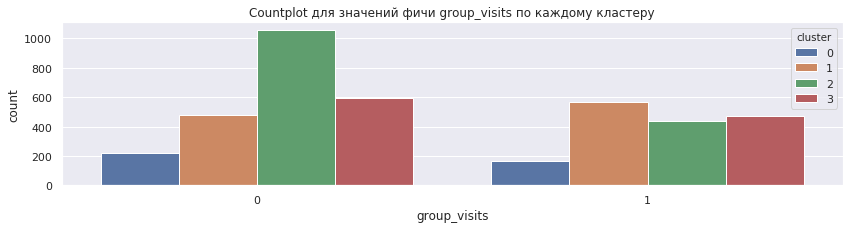

age


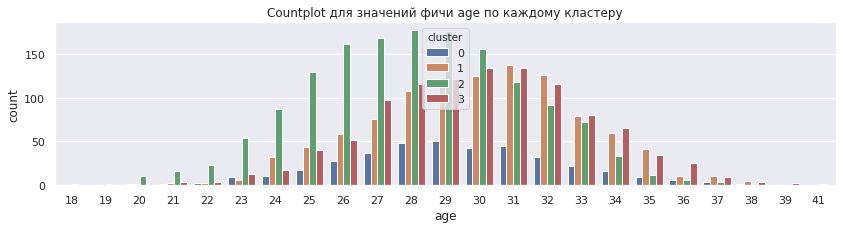

avg_additional_charges_total


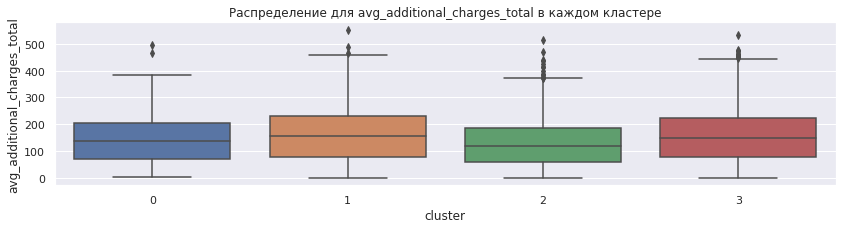

month_to_end_contract


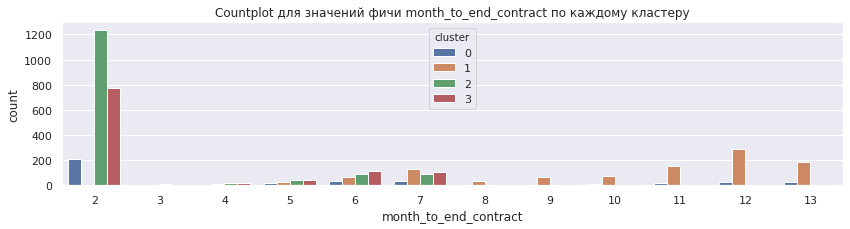

lifetime


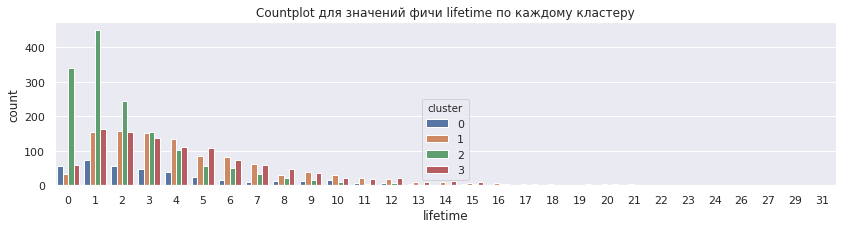

avg_class_frequency_total


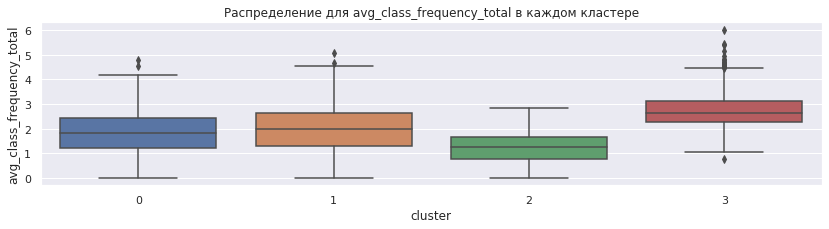

avg_class_frequency_current_month


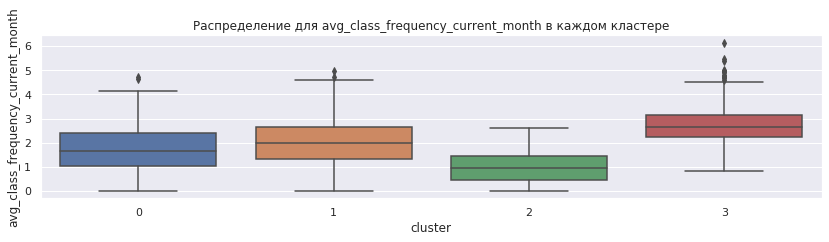

churn


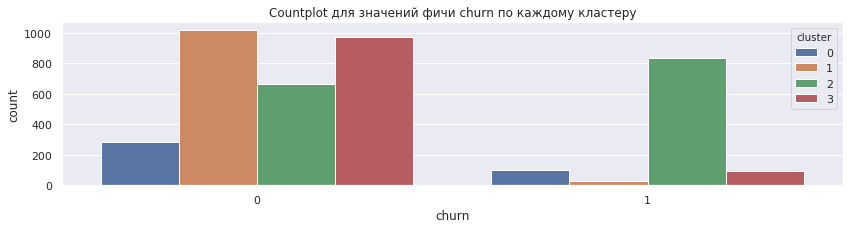

In [36]:
feauture_list = [i for i in df if i !='cluster']
for feature in feauture_list:
    if df[feature].nunique()>df.shape[0]/2:
        print(feature)
        plt.figure(figsize=(14, 3))
        ax = sns.boxplot(x='cluster', y=feature, data=df)
        ax.set(title=f'Распределение для {feature} в каждом кластере')
        plt.show()
    else:
        print(feature)
        plt.figure(figsize=(14, 3))
        ax = sns.countplot(x=feature, hue='cluster', data=df)
        ax.set(title=f'Countplot для значений фичи {feature} по каждому кластеру')
        plt.show()

### Вывод
__Выделяется кластер с лейблом 2__
* Cамые высокие значения по признакам contract_period, month_to_end_contract, avg_class_frequency_total, avg_class_frequency_current_month. Эти люди много тратят на доп услуги,у них длинные абонементы и срок окончания еще не скоро.

### 6. Для каждого полученного кластера посчитайте долю оттока.
* Отличаются ли они по доле оттока? 
* Какие кластеры склонны к оттоку, а какие — надёжны?

In [37]:
temp = df.groupby(['cluster','churn']).count().iloc[:,:1]
temp.columns=['unique_clients']
temp.reset_index(inplace=True)
temp.set_index('cluster', inplace=True)
clients_in_cluster = temp.groupby('cluster').agg({'unique_clients':'sum'}).rename(columns={'unique_clients':'total'})
temp = temp.join(clients_in_cluster)
temp['churn_share'] = round((temp['unique_clients']/temp['total']),2)


In [38]:
temp

,churn,unique_clients,total,churn_share
cluster,,,,
0,0,283,386,0.73
0,1,103,386,0.27
1,0,1018,1047,0.97
1,1,29,1047,0.03
2,0,665,1498,0.44
2,1,833,1498,0.56
3,0,973,1069,0.91
3,1,96,1069,0.09


### Вывод
__Кластеры отличаются по доле оттока__
   * Наиболее надежные к оттоку: 0,1,2
   * Наиболее отточные: 3
    

---

## Шаг 5. Вывод и рекомендации по работе с клиентами фитнес клуба

* 1. Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.
* 2. Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

### Маркетинговые действия можно разделить на 3 части:


#### 1. Работа с текущими, не отточными клиентами
 * Скорее всего таких клиентов все устраивает, остается держать сервис на таком же уровне или стараться его совершенствовать

#### 2. Работа с клиентами, которые попадают в отток
 * Таких клиентов можно сегментировать в зависимости от вероятности соответствия оттоку.
     * __Высокая вероятность оттока__ - можно позвонить и попросить поделиться, что не устраивает клиента, предложить скидку или подарок. 
     * __Средняя вероятность оттока__ - прислать по смс/пуш/почте купон на небольшой скидкой и просьбой пройти опрос о качестве сервиса
    
     * __Низкая вероятность оттока__ - выделить в отдельную базу ремаркетинга и работать на лояльность
     
 * Отдельный вопрос, который меня интересует - если мы сможем у клиентов с высокой вероятностью оттока поменять значение признаков, скажем, после маркетинговых действий они начнут больше тратить денег на доп услуги и чаще посещать фитнес. Значит ли это, что клент действительно станет не отточным не только для модели, но и фактически? Тут есть опасность того, что услуги будут агрессивно навязываться, чтобы улучшить метрики и так не лояльному клиенту. 

#### 3. Привлечение новых клиентов
 * Если закупать рекламу, то стараться чтобы портрет пользователя соответствовал не отточному портрету, на столько, на сколько это возможно.
 * Смотреть, чтобы доля клиентов в базе наращивалась именно по сегментам с неотточными признаками.
 * К примеру, в таргетированной или контекстной рекламе можно понижать ставки на определенные интересы, смотря на аффинити-индекс.
 * В аудиторных закупках подбирать правильные характеристики.
 * Попробовать предиктить оттока как можно раньше и строить наилучший и нахудший сценарии, для прогнозирования финансовых показателей